# Upload skeletons to CATMAID
- Download kimimaro skeleton
- Set the soma, and fuse skeleton.
- Downsample and upload. 

In [1]:
import sys
import fanc_seg_utils as fs
import numpy as np
from meshparty import trimesh_vtk, skeleton_io, trimesh_io
import pymaid
from fanc_seg_utils import skeleton_manipulations
from fanc_seg_utils import catmaid_utilities
from matplotlib import pyplot as plt

/Users/brandon/anaconda3/envs/connectomics_analysis/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


In [2]:
FANC4 = 'https://storage.googleapis.com/zetta_lee_fly_vnc_001_segmentation/vnc1_full_v3align_2/realigned_v1/seg/full_run_v1'
FANC4_id = [72764718930333235,72342917976708692]
source_instance = catmaid_utilities.catmaid_login(project = 'fanc', project_id = 2, key_file_path = '/Users/brandon/Documents/MN_Analysis/catmaid_keys.txt')
target_instance = catmaid_utilities.catmaid_login(project = 'fanc', project_id= 60,key_file_path='/Users/brandon/Documents/MN_Analysis/catmaid_keys.txt')


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO:pymaid:Global CATMAID instance set. Caching is ON.
INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO:pymaid:Global CATMAID instance set. Caching is ON.


In [3]:
## Get the FANC4 skeleton, set the soma, downsample and smooth the diameter. 
#pymaid_n = pymaid.get_neuron([11596],remote_instance=source_instance)
FANC4_neuron = fs.get_skeleton(FANC4_id,method = 'kimimaro',cv_path=FANC4,output='pymaid',name = 'MN_A101_T1R',annotations=['right_soma', 'left-right homologs 9862 & 11597’'],merge=True)
FANC4_neuron = skeleton_manipulations.set_soma(FANC4_neuron,np.array([11810.0, 116684.5, 1478.0]))
pymaid.downsample_neuron(FANC4_neuron,resampling_factor=6,inplace=True)
FANC4_neuron = skeleton_manipulations.diameter_smoothing(FANC4_neuron,smooth_method='smooth',smooth_bandwidth=1000)

In [6]:
catmaid_utilities.upload_to_CATMAID(FANC4_neuron,target_project=target_instance)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

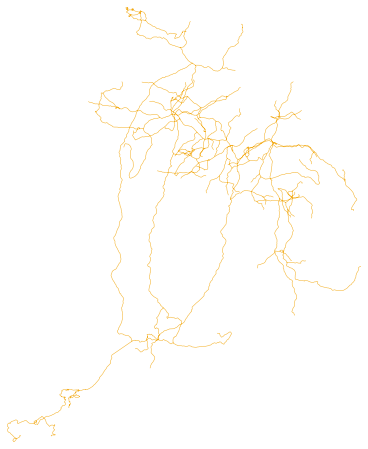

In [5]:
pymaid.plot2d(FANC4_neuron)

In [ ]:
sk = skeletonization.get_kimimaro_skeleton(FANC4_id,cv_path=FANC4)

In [8]:
str(FANC4_id)

'[72764718930333235, 72342917976708692]'

In [ ]:
cv = CloudVolume(FANC4)

In [ ]:
cv.skeleton.get(FANC4_id)